In [27]:
# 나눔고딕 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [43]:
import ssl
import json
from urllib.parse import quote
from urllib.request import Request, urlopen
from urllib import request

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
plt.rc('font', family='NanumBarunGothic')
# plt.rc('font', family='Malgun Gothic')

In [30]:
s_key='BJ0BlwJg8I0JN02FYdDy3D6Own7X3vtc7G7i39Mp'

In [31]:
# 용도 구분된 전력사용량 API 불러오기

usage_data = []
for year in ['2018','2019','2020','2021','2022']:
    for month in ['01','02','03','04','05','06','07','08','09','10','11','12']:
        try:
            usage_url = f'https://bigdata.kepco.co.kr/openapi/v1/powerUsage/contractType.do?year={year}&month={month}&metroCd=11&apiKey={s_key}&returnType=json'
            response = request.urlopen(usage_url)
            json_response = response.read()
            usage = json.loads(json_response)
            usages = usage['data']
            for u in usages:
                usage_data.append(u)
        except:
            pass

usage_df = pd.json_normalize(usage_data) 
usage_df

,year,month,metro,city,cntr,custCnt,powerUsage,bill,unitCost
0,2018,01,서울특별시,강남구,가로등,12433,2454583,255997618,104.3
1,2018,01,서울특별시,강남구,교육용,134,5651189,554004511,98.0
2,2018,01,서울특별시,강남구,농사용,224,167208,7855836,47.0
3,2018,01,서울특별시,강남구,산업용,1093,28325380,3501527447,123.6
4,2018,01,서울특별시,강남구,심 야,836,1894086,165499679,87.4
...,...,...,...,...,...,...,...,...,...
10395,2022,12,서울특별시,중랑구,농사용,46,29299,2092927,71.4
10396,2022,12,서울특별시,중랑구,산업용,2612,5961596,875080415,146.8
10397,2022,12,서울특별시,중랑구,심 야,347,281826,27946557,99.2
10398,2022,12,서울특별시,중랑구,일반용,20841,40341978,6521732445,161.7


In [32]:
#산업용 / 주택용 필터링
usage_df = usage_df[usage_df['cntr'].isin(['산업용','주택용'])]

#평균 전력사용량 구해서 컬럼 추가
usage_df['AveragePowerUsage'] =(usage_df['powerUsage'] / usage_df['custCnt']).round(2)
usage_df

<ipython-input-32-6b7df105b286>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usage_df['AveragePowerUsage'] =(usage_df['powerUsage'] / usage_df['custCnt']).round(2)


,year,month,metro,city,cntr,custCnt,powerUsage,bill,unitCost,AveragePowerUsage
3,2018,01,서울특별시,강남구,산업용,1093,28325380,3501527447,123.6,25915.26
6,2018,01,서울특별시,강남구,주택용,133550,76790612,9529766538,124.1,575.00
10,2018,01,서울특별시,강동구,산업용,1214,15340328,1751488402,114.2,12636.18
13,2018,01,서울특별시,강동구,주택용,107356,49434736,5693227260,115.2,460.47
17,2018,01,서울특별시,강북구,산업용,1547,5493938,651371135,118.6,3551.35
...,...,...,...,...,...,...,...,...,...,...
10386,2022,12,서울특별시,종로구,주택용,65958,22161770,3230549039,145.8,336.00
10389,2022,12,서울특별시,중구,산업용,5383,18535546,2827431456,152.5,3443.35
10392,2022,12,서울특별시,중구,주택용,43592,18061905,2491573215,137.9,414.34
10396,2022,12,서울특별시,중랑구,산업용,2612,5961596,875080415,146.8,2282.39


In [33]:
# 용도, 구별로 평균 구하기 
grouped_df = usage_df.groupby([usage_df.iloc[:,4],usage_df.iloc[:,3]]).mean().round(2)

<ipython-input-33-e6bfe19eb181>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = usage_df.groupby([usage_df.iloc[:,4],usage_df.iloc[:,3]]).mean().round(2)


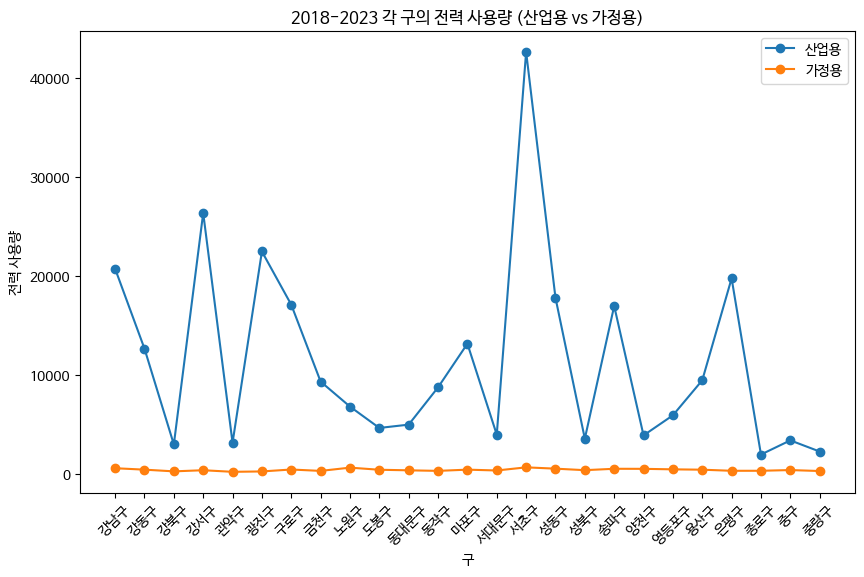

In [34]:
# 산업용과 가정용 데이터 분리
Indu_data = grouped_df.loc['산업용', 'AveragePowerUsage']
Home_data = grouped_df.loc['주택용', 'AveragePowerUsage']

# 그래프 생성
plt.figure(figsize=(10, 6))

# 산업용 데이터 시각화
plt.plot(Indu_data.index, Indu_data.values, marker='o', label='산업용')

# 가정용 데이터 시각화
plt.plot(Home_data.index, Home_data.values, marker='o', label='가정용')

# # 각 marker에 해당하는 값 표시
# for i in range(len(Indu_data)):
#     plt.text(Indu_data.index[i], Indu_data.values[i], str(Indu_data.values[i]), ha='center', va='bottom')
# for i in range(len(Home_data)):
#     plt.text(Home_data.index[i], Home_data.values[i], str(Home_data.values[i]), ha='center', va='bottom')


# 그래프 제목과 축 레이블 설정
plt.title('2018-2023 각 구의 전력 사용량 (산업용 vs 가정용)')
plt.xlabel('구')
plt.ylabel('전력 사용량')
plt.xticks(rotation=45)

# 범례 표시
plt.legend()

plt.show()

> 주택용 서울 평균 전력 사용량

In [35]:
# 연도, 구별로 평균 구하기 (주택용)
Home_usage_df = usage_df[usage_df['cntr'].isin(['주택용'])]
year_grouped_df = Home_usage_df.groupby([usage_df.iloc[:,0]]).mean().round(2)

<ipython-input-35-d472c88b9a5b>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_grouped_df = Home_usage_df.groupby([usage_df.iloc[:,0]]).mean().round(2)


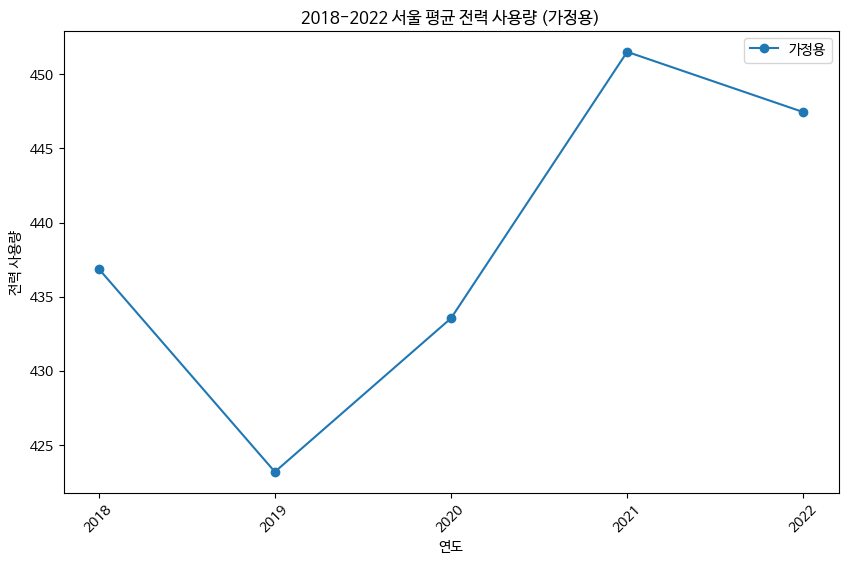

In [36]:
# 그래프 생성
plt.figure(figsize=(10, 6))

# # 각 marker에 해당하는 값 표시
# for i in range(len(Indu_data)):
#     plt.text(Indu_data.index[i], Indu_data.values[i], str(Indu_data.values[i]), ha='center', va='bottom')
# for i in range(len(Home_data)):
#     plt.text(Home_data.index[i], Home_data.values[i], str(Home_data.values[i]), ha='center', va='bottom')

plt.plot(year_grouped_df.index, year_grouped_df['AveragePowerUsage'], marker='o', label='가정용')

# 그래프 제목과 축 레이블 설정
plt.title('2018-2022 서울 평균 전력 사용량 (가정용)')
plt.xlabel('연도')
plt.ylabel('전력 사용량')
plt.xticks(rotation=45)

# 범례 표시
plt.legend()

plt.show()

> 산업용 서울 평균 전력 사용량

In [37]:
# 연도, 구별로 평균 구하기 (산업용)
Indu_usage_df = usage_df[usage_df['cntr'].isin(['산업용'])]
year_grouped_df = Indu_usage_df.groupby([usage_df.iloc[:,0]]).mean().round(2)

<ipython-input-37-28d752b493b9>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_grouped_df = Indu_usage_df.groupby([usage_df.iloc[:,0]]).mean().round(2)


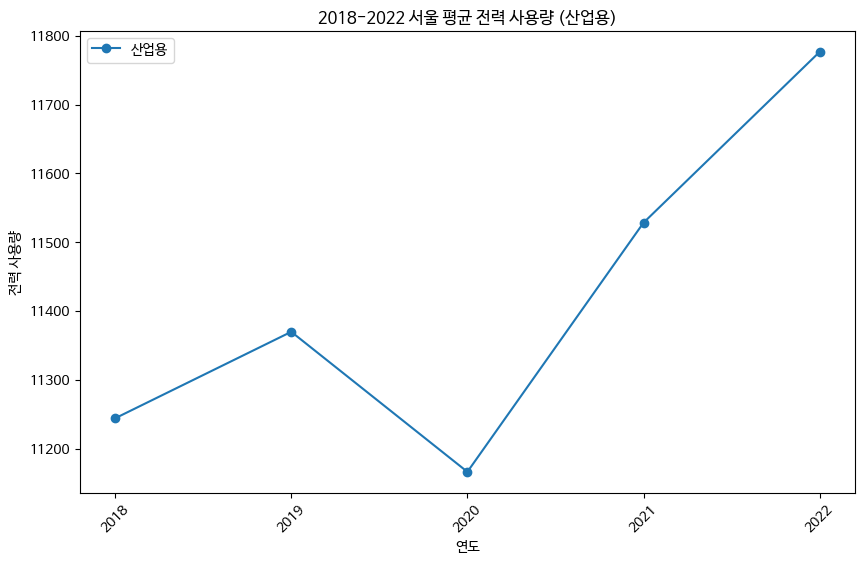

In [38]:
# 그래프 생성
plt.figure(figsize=(10, 6))

# # 각 marker에 해당하는 값 표시
# for i in range(len(Indu_data)):
#     plt.text(Indu_data.index[i], Indu_data.values[i], str(Indu_data.values[i]), ha='center', va='bottom')
# for i in range(len(Home_data)):
#     plt.text(Home_data.index[i], Home_data.values[i], str(Home_data.values[i]), ha='center', va='bottom')

plt.plot(year_grouped_df.index, year_grouped_df['AveragePowerUsage'], marker='o', label='산업용')

# 그래프 제목과 축 레이블 설정
plt.title('2018-2022 서울 평균 전력 사용량 (산업용)')
plt.xlabel('연도')
plt.ylabel('전력 사용량')
plt.xticks(rotation=45)

# 범례 표시
plt.legend()

plt.show()

In [39]:
# 데이터 가져오기 및 데이터프레임으로 변환

total_data = []

for year in ['2018','2019','2020','2021','2022','2023']:
    # month_list = [str(month).zfill(2) for month in range(1, 13)]
    for month in ['01','02','03','04','05','06','07','08','09','10','11','12']:
        try:
            s_key='BJ0BlwJg8I0JN02FYdDy3D6Own7X3vtc7G7i39Mp'
            url = f'https://bigdata.kepco.co.kr/openapi/v1/powerUsage/houseAve.do?year={year}&month={month}&metroCd=11&apiKey={s_key}&returnType=json'
            response = request.urlopen(url)
            json_response = response.read()
            users = json.loads(json_response)
            body = users['data']
            for b in body:
                total_data.append(b)
            
        except:
            pass

total_df = pd.json_normalize(total_data)
total_df

,year,month,metro,city,houseCnt,powerUsage,bill
0,2018,01,서울특별시,동대문구,182971,229.45,25806
1,2018,01,서울특별시,종로구,84348,225.71,29078
2,2018,01,서울특별시,성동구,140975,257.04,29464
3,2018,01,서울특별시,도봉구,143883,262.08,28996
4,2018,01,서울특별시,은평구,211171,248.53,29497
...,...,...,...,...,...,...,...
1570,2023,03,서울특별시,마포구,197058,203.38,26090
1571,2023,03,서울특별시,구로구,206134,206.16,25857
1572,2023,03,서울특별시,종로구,87645,181.00,25537
1573,2023,03,서울특별시,중구,75733,189.61,24726


In [40]:
# 년-월 필드 추가

def get_date(year, month):
    return year+'-'+month

total_df['date'] = total_df.apply(lambda x: get_date(x['year'],x['month']), axis = 1)
total_df

,year,month,metro,city,houseCnt,powerUsage,bill,date
0,2018,01,서울특별시,동대문구,182971,229.45,25806,2018-01
1,2018,01,서울특별시,종로구,84348,225.71,29078,2018-01
2,2018,01,서울특별시,성동구,140975,257.04,29464,2018-01
3,2018,01,서울특별시,도봉구,143883,262.08,28996,2018-01
4,2018,01,서울특별시,은평구,211171,248.53,29497,2018-01
...,...,...,...,...,...,...,...,...
1570,2023,03,서울특별시,마포구,197058,203.38,26090,2023-03
1571,2023,03,서울특별시,구로구,206134,206.16,25857,2023-03
1572,2023,03,서울특별시,종로구,87645,181.00,25537,2023-03
1573,2023,03,서울특별시,중구,75733,189.61,24726,2023-03


## 서울시 전체 년월별 전력소비량 변화 추이 (가정용)

In [41]:
group1 = total_df.groupby('date')['powerUsage'].mean().reset_index()
group1

,date,powerUsage
0,2018-01,244.3656
1,2018-02,247.0644
2,2018-03,210.3304
3,2018-04,215.3428
4,2018-05,202.0444
...,...,...
58,2022-11,210.9412
59,2022-12,224.2368
60,2023-01,246.8776
61,2023-02,237.0536


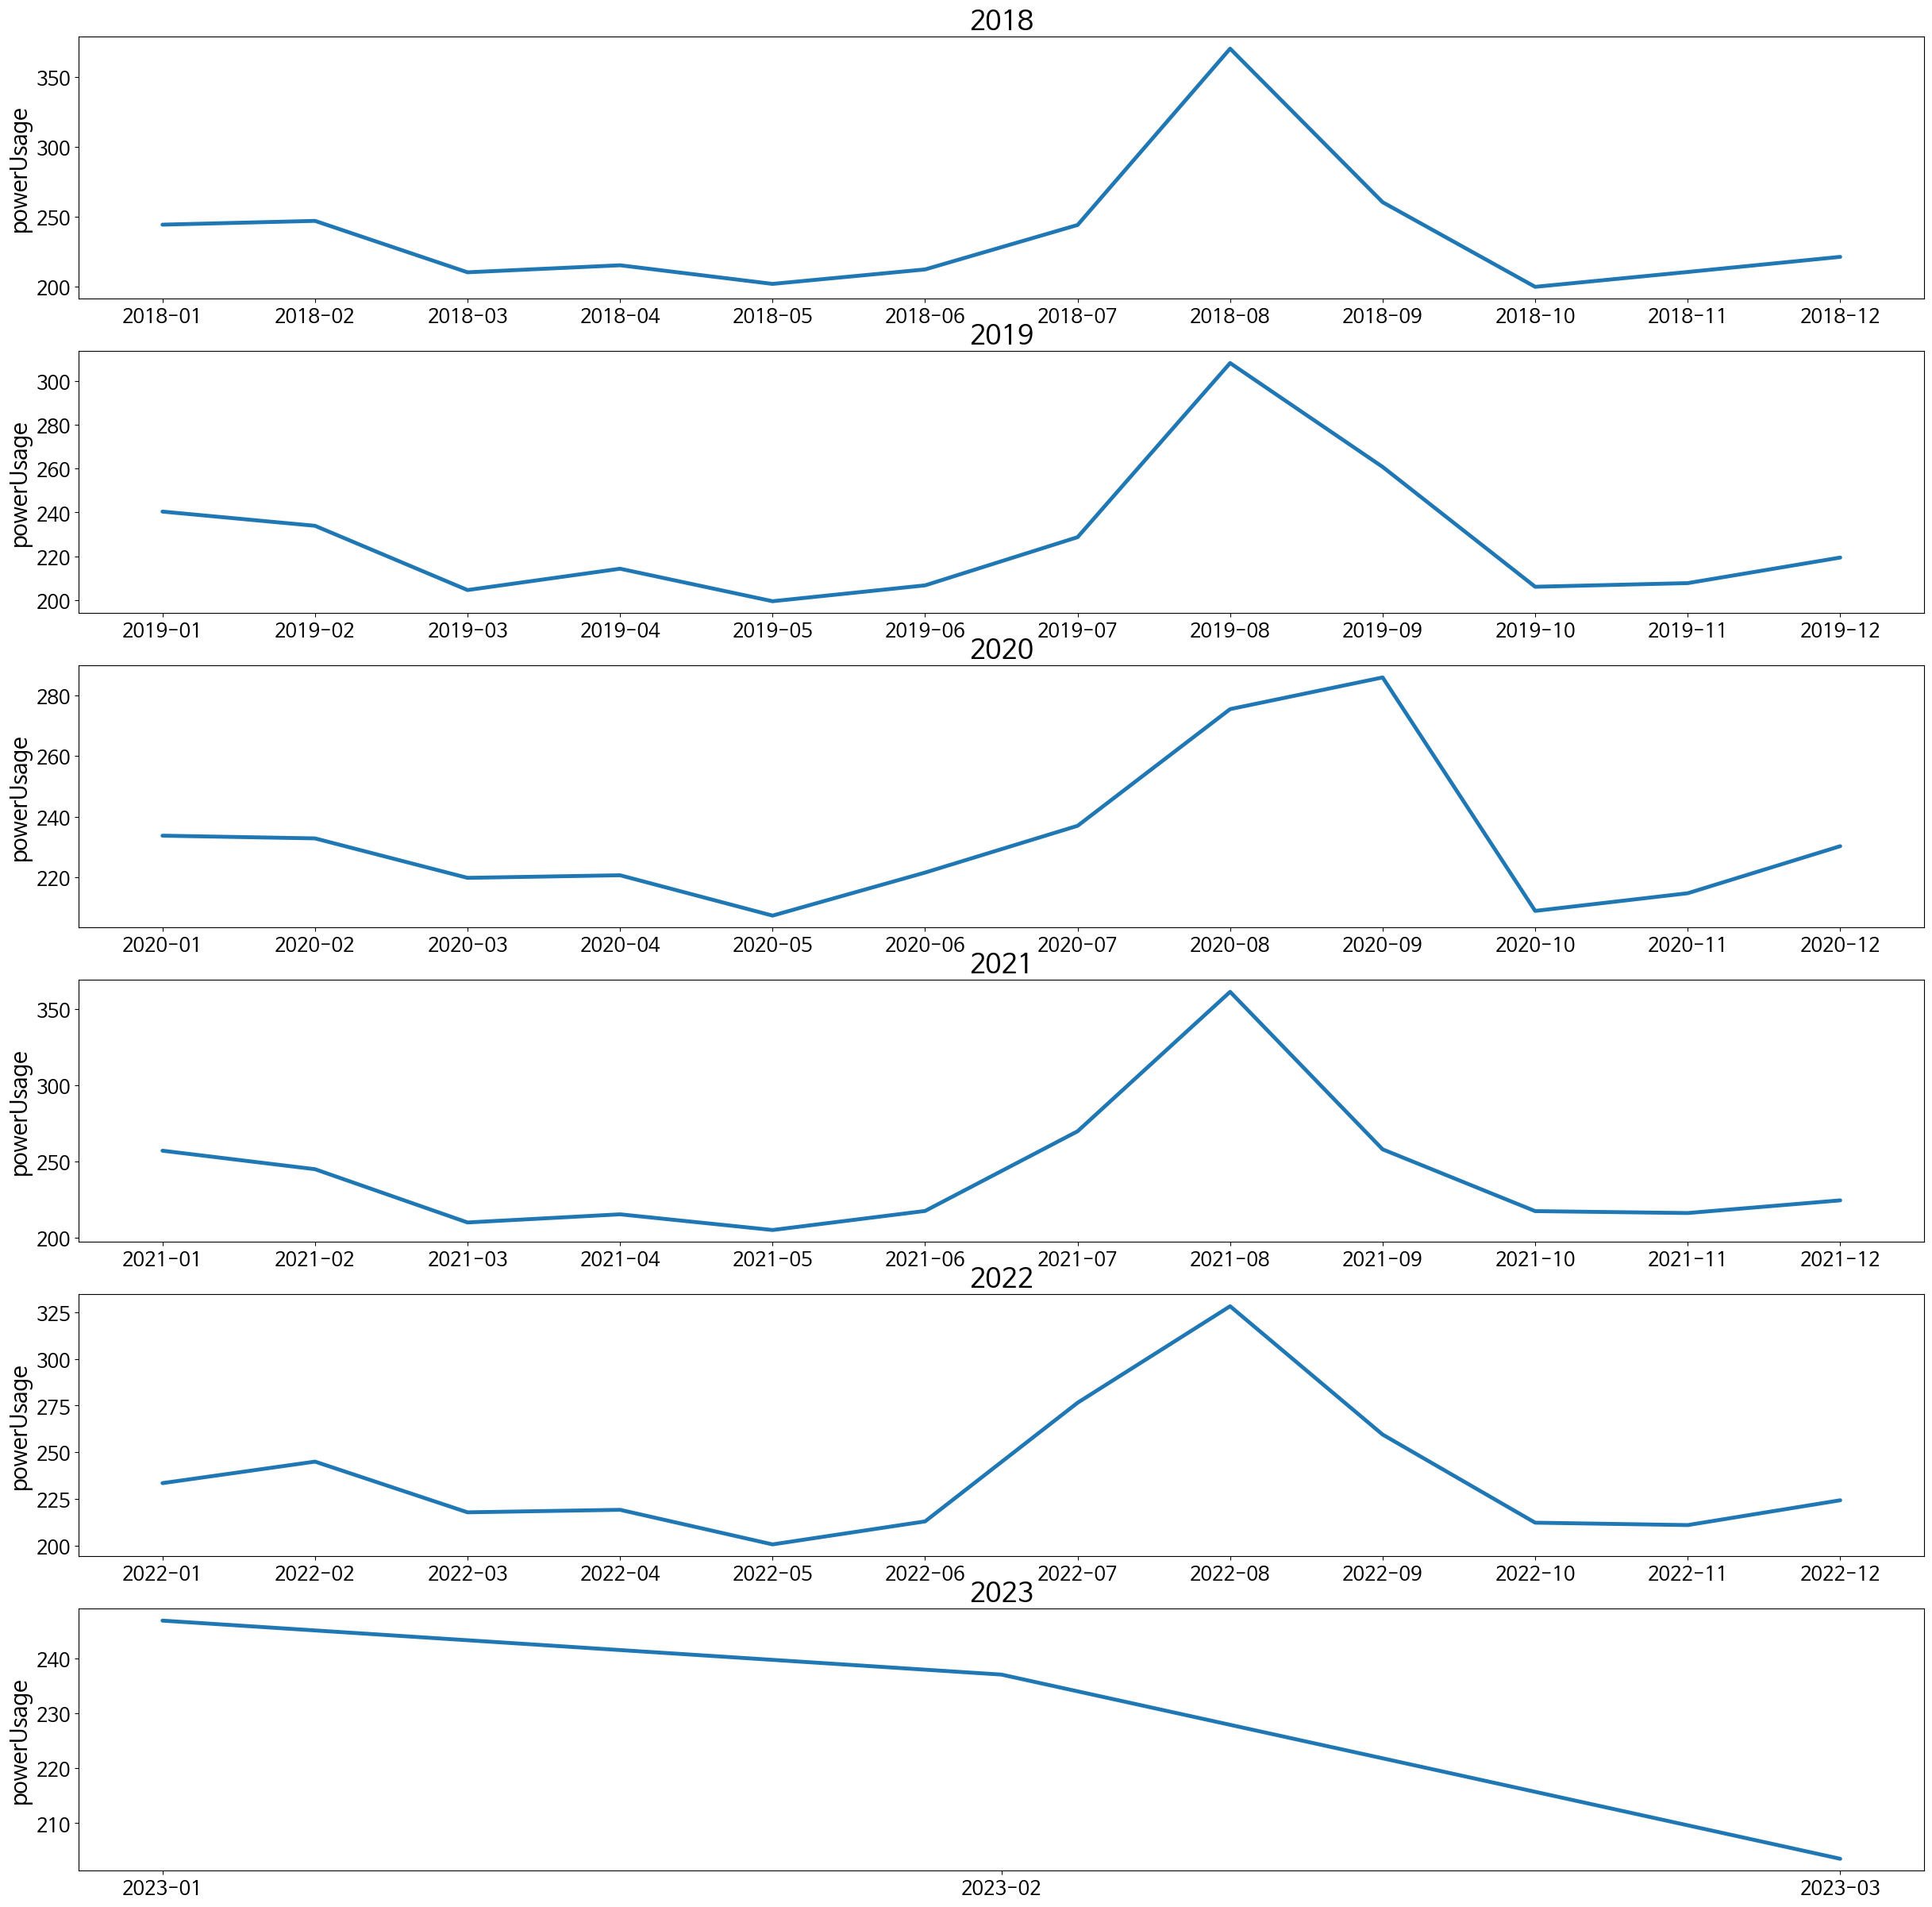

In [44]:
fig, ax = plt.subplots(nrows=6,figsize = (30,30))
group1_2018 = group1[group1['date'].str[:4] == '2018']
group1_2019 = group1[group1['date'].str[:4] == '2019']
group1_2020 = group1[group1['date'].str[:4] == '2020']
group1_2021 = group1[group1['date'].str[:4] == '2021']
group1_2022 = group1[group1['date'].str[:4] == '2022']
group1_2023 = group1[group1['date'].str[:4] == '2023']

sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='whitegrid')
sns.lineplot(data = group1_2018, x = 'date', y = 'powerUsage',linewidth = 3.5, ax = ax[0])
plt.xlabel("")
sns.lineplot(data = group1_2019, x = 'date', y = 'powerUsage',linewidth = 3.5, ax = ax[1])
plt.xlabel("")
sns.lineplot(data = group1_2020, x = 'date', y = 'powerUsage',linewidth = 3.5, ax = ax[2])
plt.xlabel("")
sns.lineplot(data = group1_2021, x = 'date', y = 'powerUsage',linewidth = 3.5, ax = ax[3])
plt.xlabel("")
sns.lineplot(data = group1_2022, x = 'date', y = 'powerUsage',linewidth = 3.5, ax = ax[4])
plt.xlabel("")
sns.lineplot(data = group1_2023, x = 'date', y = 'powerUsage',linewidth = 3.5, ax = ax[5])

ax[0].set_title("2018",fontsize=25)
ax[0].set_xlabel("")
ax[0].set_ylabel("powerUsage",fontsize=20)
ax[0].tick_params(labelsize = 18)
ax[1].set_title("2019",fontsize=25)
ax[1].set_xlabel("")
ax[1].set_ylabel("powerUsage",fontsize=20)
ax[1].tick_params(labelsize = 18)
ax[2].set_title("2020",fontsize=25)
ax[2].set_xlabel("")
ax[2].set_ylabel("powerUsage",fontsize=20)
ax[2].tick_params(labelsize = 18)
ax[3].set_title("2021",fontsize=25)
ax[3].set_xlabel("")
ax[3].set_ylabel("powerUsage",fontsize=20)
ax[3].tick_params(labelsize = 18)
ax[4].set_title("2022",fontsize=25)
ax[4].set_xlabel("")
ax[4].set_ylabel("powerUsage",fontsize=20)
ax[4].tick_params(labelsize = 18)
ax[5].set_title("2023",fontsize=25)
ax[5].set_xlabel("")
ax[5].set_ylabel("powerUsage",fontsize=20)
ax[5].tick_params(labelsize = 18)

plt.show()

## 서울시 전체 월별 전력소비량 변화 (가정용)

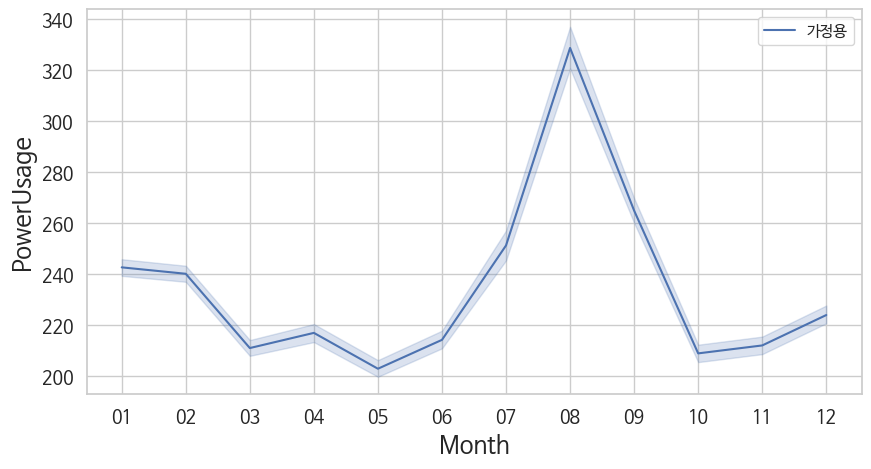

In [51]:
sns.set(font="NanumBarunGothic", rc={"axes.unicode_minus":False}, style='whitegrid')
fig,ax=plt.subplots(figsize=(10,5))
sns.lineplot(data = total_df, x = 'month', y = 'powerUsage',label = '가정용')
plt.xlabel('Month',fontsize=17)
plt.ylabel('PowerUsage', fontsize=17)
plt.tick_params(labelsize=13)